# Importando base de dados

In [132]:
import pandas as pd

In [133]:
dados = pd.read_csv('tips.csv')

In [134]:
dados

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


# Tradução

In [135]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [136]:
gorjetas = dados.rename(columns={'total_bill': 'valor_da_conta',
                      'tip': 'gorjeta', 
                      'dessert': 'sobremesa',
                      'day': 'dia_da_semana', 
                      'time': 'hora_do_dia', 
                      'size': 'total_de_pessoas'})

In [137]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [138]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [139]:
gorjetas['sobremesa'].unique()

array(['No', 'Yes'], dtype=object)

In [140]:
sim_nao = {'No': 'Não', 'Yes': 'Sim'}

In [141]:
gorjetas['sobremesa'].map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [142]:
# atribuindo a variável sim_não nos dados de sobremesa do DF
gorjetas['sobremesa'] = gorjetas['sobremesa'].map(sim_nao)

In [143]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [144]:
# encontrando os valores únicos da coluna 'dia_da_semana'
gorjetas['dia_da_semana'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [145]:
dias = {'Sun': 'Domingo', 'Sat': 'Sábado', 'Thur': 'Quinta', 'Fri':'Sexta'}

In [146]:
gorjetas['dia_da_semana'] = gorjetas['dia_da_semana'].map(dias)

In [147]:
gorjetas['dia_da_semana'].unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [148]:
gorjetas['hora_do_dia'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [149]:
hora = {'Dinner': 'Jantar', 'Lunch': 'Almoço'}

In [150]:
gorjetas['hora_do_dia'] = gorjetas['hora_do_dia'].map(hora)

In [151]:
gorjetas['hora_do_dia'].unique()

array(['Jantar', 'Almoço'], dtype=object)

# Importando o Seaborn

In [152]:
!pip install seaborn

In [153]:
import seaborn as sns

# Análise I - Valor da conta e gorjeta

In [154]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

[Text(0, 0.5, 'Valor da Gorjeta')]

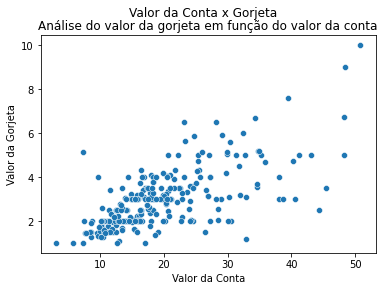

In [155]:
# criando um gráfico de dispersão. Eixo X com o valor da conta e a gorjeta no Eixo Y.
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)
# incluindo o subtítulo
valor_gorjeta.figure.suptitle('Valor da Conta x Gorjeta')
# incluindo o título no gráfico
valor_gorjeta.set_title('Análise do valor da gorjeta em função do valor da conta')
# alterando o título do eixo X
valor_gorjeta.set(xlabel='Valor da Conta')
# alterando o título do eixo Y
valor_gorjeta.set(ylabel='Valor da Gorjeta')

**Visualmente o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [156]:
print(f'A base de dados contém {gorjetas.shape[0]} registros\n')
print(f'Registros não nulos')
# conta quantos valores contém em cada coluna da BD
gorjetas.count() 

A base de dados contém 244 registros

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Salvando o gráfico em .png

In [157]:
# criando uma variável para o gráfico
grafico_dispersao_valor_conta_x_gorjeta = valor_gorjeta.get_figure()
# Salvando  o gráfico em .png
grafico_dispersao_valor_conta_x_gorjeta.savefig('grafico_dispersao_valor_conta_x_gorjeta.png')

## Criando o campo porcentagem

In [158]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [159]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [160]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [161]:
# arredondando os valores de porcentagem
gorjetas['porcentagem'] = gorjetas['porcentagem'].round(2)

In [162]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,0.20
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07
241,22.67,2.00,Sim,Sábado,Jantar,2,0.09
242,17.82,1.75,Não,Sábado,Jantar,2,0.10


[Text(0, 0.5, 'Porcentagem da gorjeta'), Text(0.5, 0, 'Valor da Conta')]

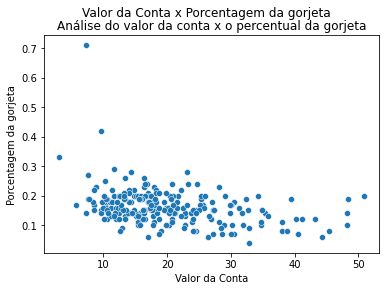

In [163]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)
porcentagem_conta.figure.suptitle('Valor da Conta x Porcentagem da gorjeta')
porcentagem_conta.set_title('Análise do valor da conta x o percentual da gorjeta')
porcentagem_conta.set(xlabel='Valor da Conta', ylabel='Porcentagem da gorjeta')

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**

In [164]:
grafico_porcentagem_conta = porcentagem_conta.get_figure()
grafico_porcentagem_conta.savefig('grafico_porcentagem_conta_dispersao.png')

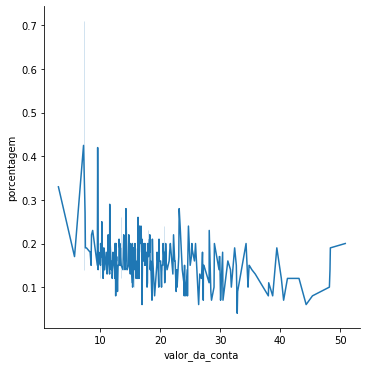

In [166]:
# criando um gráfico de linha. Utilizar a atributo kind='line'
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

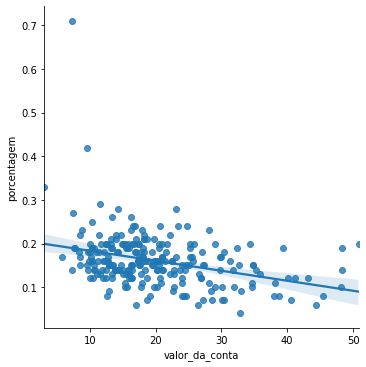

In [168]:
# indica a tendência da dispersão.
porcentagem_conta_dispersao_linha = sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

# Análise II - Sobremesa

In [170]:
# analisando quem pediu sobremesa
gorjetas[gorjetas['sobremesa'] == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [171]:
# analisando quem não pediu sobremesa
gorjetas[gorjetas['sobremesa'] == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


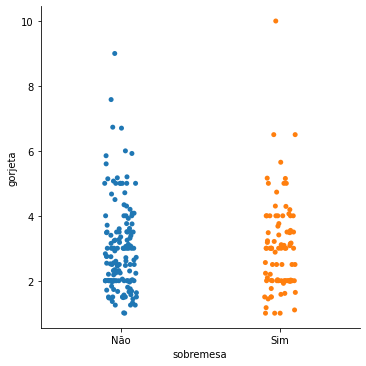

In [172]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

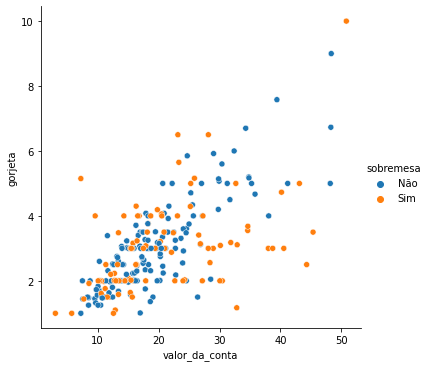

In [173]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

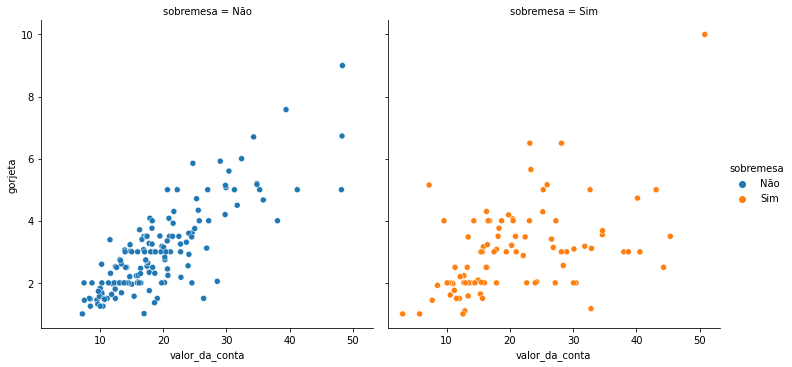

In [174]:
sns.relplot(data=gorjetas, x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa')

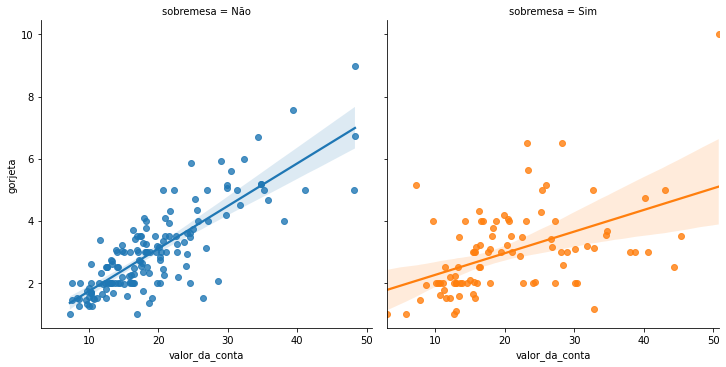

In [175]:
sns.lmplot(data=gorjetas, x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa')

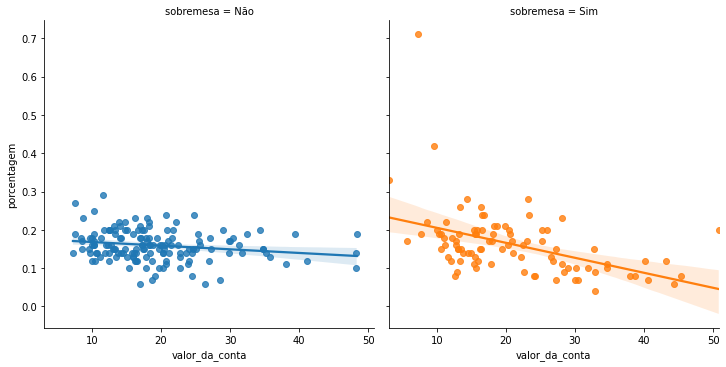

In [176]:
sns.lmplot(data=gorjetas, x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa')

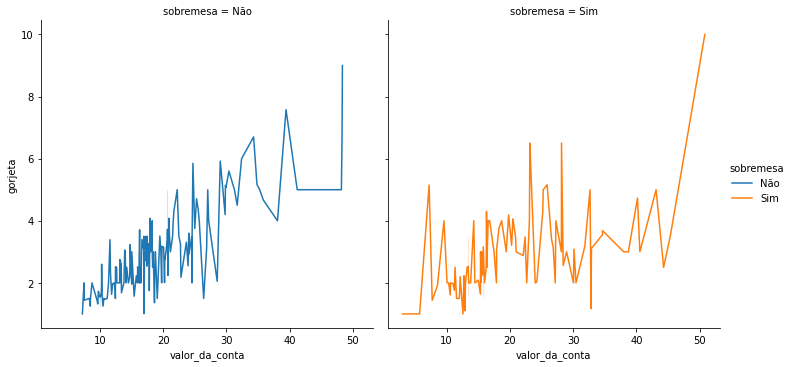

In [177]:
sns.relplot(data=gorjetas, x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', kind='line')

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e daqueles que não pediram.**

## Teste de hipótese

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [178]:
from scipy.stats import ranksums

In [183]:
sobremesa = gorjetas.query('sobremesa == "Sim"').porcentagem

In [184]:
sem_sobremesa = gorjetas.query('sobremesa == "Não"').porcentagem

In [187]:
r = ranksums(sobremesa, sem_sobremesa)

In [189]:
print(f'O valor do p-value é {r.pvalue}')

O valor do p-value é 0.5266635660124415


**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Análise III - Dias da semana

In [190]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [191]:
gorjetas['dia_da_semana'].unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

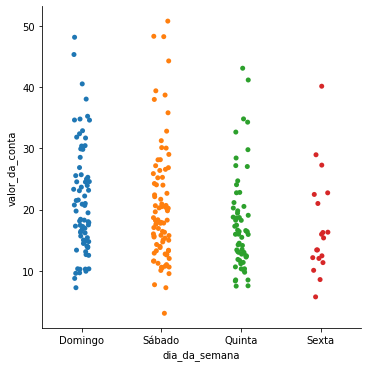

In [193]:
sns.catplot(data=gorjetas, x='dia_da_semana', y='valor_da_conta')

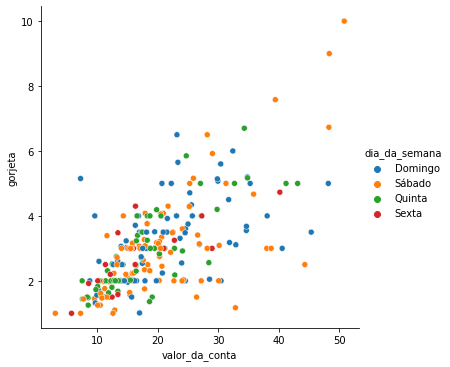

In [202]:
sns.relplot(data=gorjetas, x='valor_da_conta', y='gorjeta', hue='dia_da_semana')

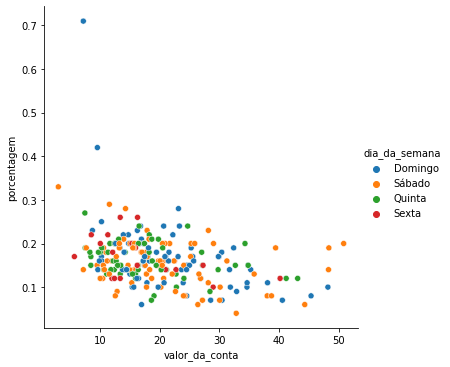

In [203]:
sns.relplot(data=gorjetas, x='valor_da_conta', y='porcentagem', hue='dia_da_semana')

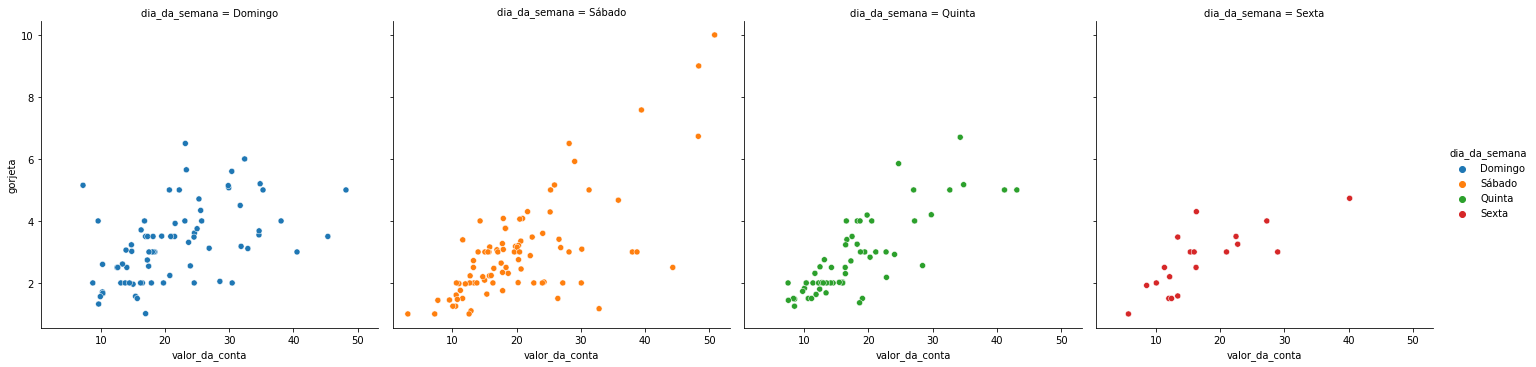

In [204]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

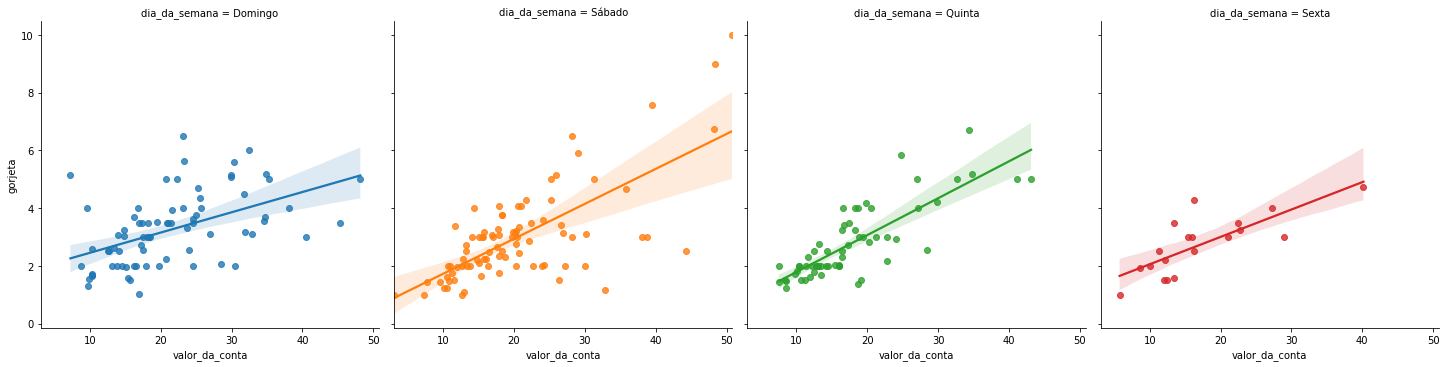

In [205]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

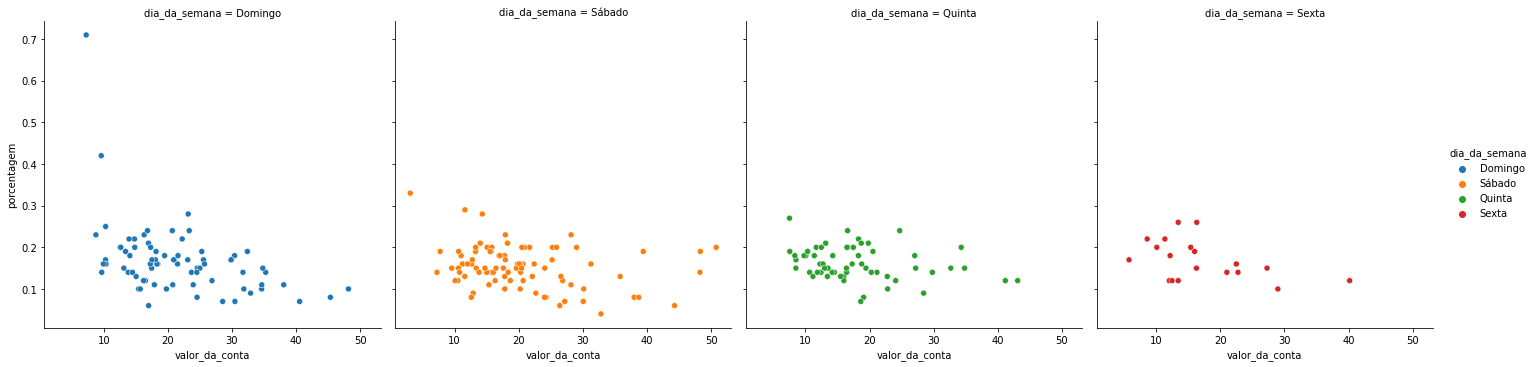

In [206]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

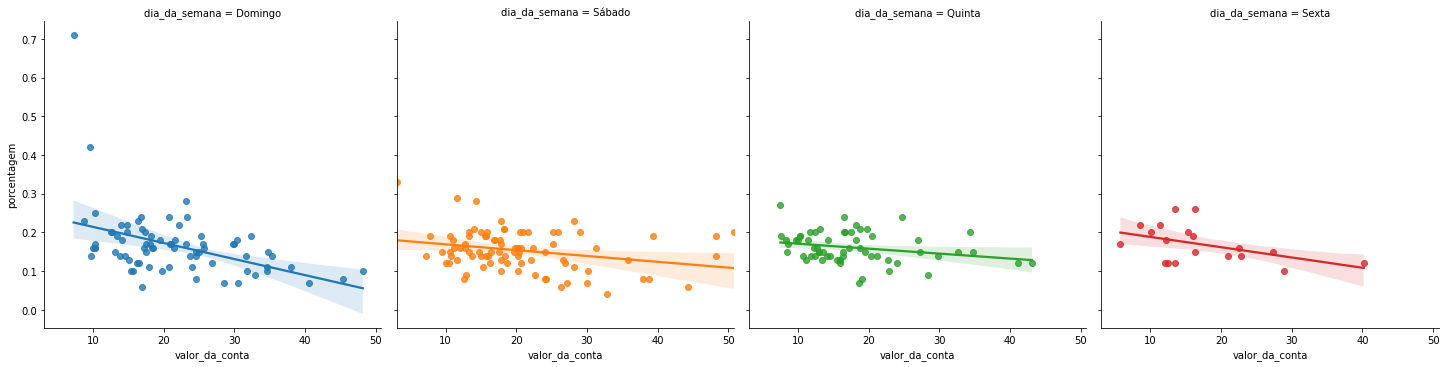

In [207]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [210]:
media_geral_gorjetas = gorjetas['gorjeta'].mean()

In [211]:
print(f'A média geral das gorjetas é de {media_geral_gorjetas}')

A média geral das gorjetas é de 2.9982786885245902


In [213]:
# adquirindo o valor da média de todos os dias da semana.
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [216]:
print('Frequência dos dias')
gorjetas['dia_da_semana'].value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de Hipótese

**H<sup>null</sup>**
>A distribuição do valor da conta é igual no sábado e no domingo

**H<sup>alt</sup>**
>A distribuição do valor da conta não é igual no sábado e no domingo

In [218]:
valor_conta_domingo = gorjetas.query('dia_da_semana == "Domingo"').valor_da_conta

In [219]:
valor_conta_sabado = gorjetas.query('dia_da_semana == "Sábado"').valor_da_conta

In [224]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f'O valor do p-value é {r2.pvalue:.6f}')

O valor do p-value é 0.357673


**H<sup>null</sup>**
>A distribuição do valor da conta é igual no sábado e no domingo

# Análise IV - Hora do dia

In [226]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [225]:
gorjetas['hora_do_dia'].unique()

array(['Jantar', 'Almoço'], dtype=object)

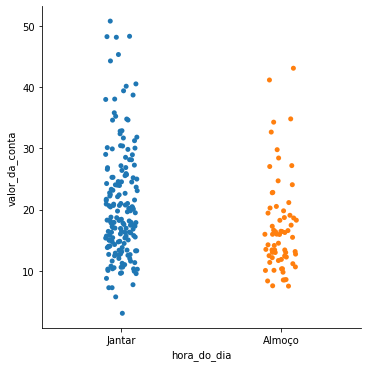

In [227]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

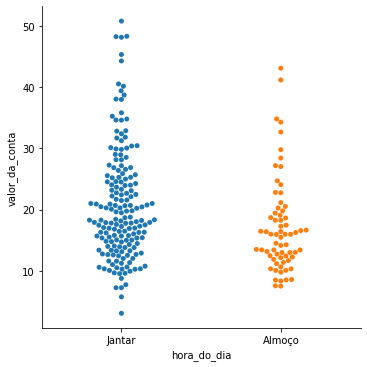

In [228]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

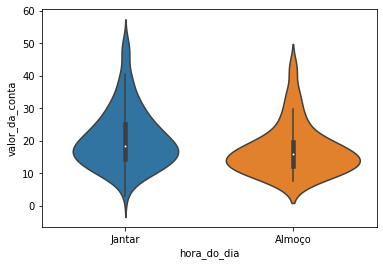

In [229]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

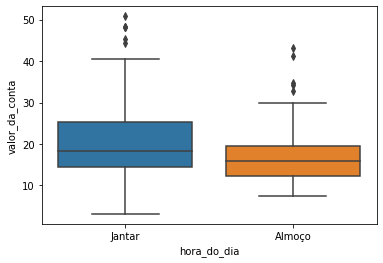

In [230]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [232]:
almoco = gorjetas.query('hora_do_dia == "Almoço"').valor_da_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


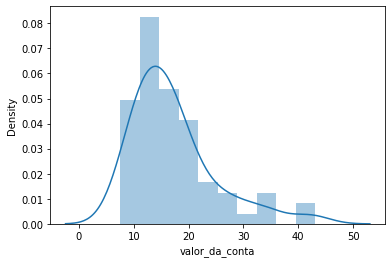

In [233]:
sns.distplot(almoco)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


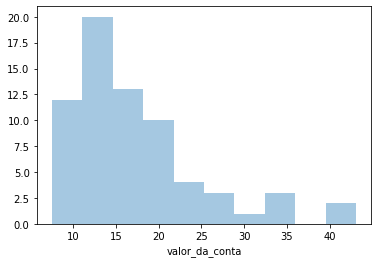

In [234]:
# criando um gráfico sem o gráfico atrás
sns.distplot(almoco, kde=False)

In [235]:
jantar = gorjetas.query('hora_do_dia == "Jantar"').valor_da_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


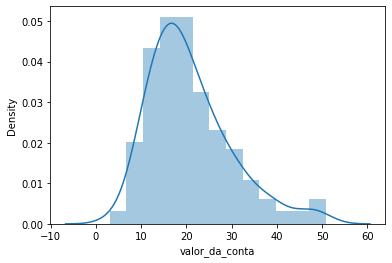

In [236]:
sns.distplot(jantar)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


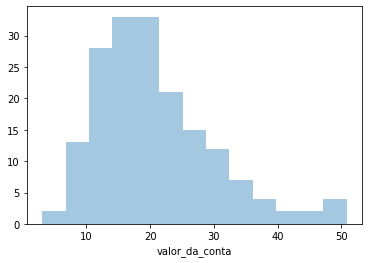

In [237]:
sns.distplot(jantar, kde=False)

In [238]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese

**H<sup>null</sup>**
>A distribuição do valor da conta é igual no jantar e no almoço

**H<sup>alt</sup>**
>A distribuição do valor da conta não é igual no jantar e no almoço

In [240]:
r3 = ranksums(jantar, almoco)

In [243]:
print(f'O valor do p-value é de {r3.pvalue:.6f}')

O valor do p-value é de 0.001179


**H<sup>alt</sup>**
>A distribuição do valor da conta não é igual no jantar e no almoço

## Teste de hipótese 2

In [245]:
porcentagem_almoco = gorjetas.query('hora_do_dia == "Almoço"').porcentagem

In [246]:
porcentagem_jantar = gorjetas.query('hora_do_dia == "Jantar"').porcentagem

In [248]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [250]:
print(f'O valor do p-value é de {r4.pvalue:.6f}')

O valor do p-value é de 0.260249


**H<sup>null</sup>**
>A distribuição da taxa da gorjeta é igual no jantar e no almoço